In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Connect to CEA code

In [3]:
import sys
import os
sys.path.append(os.path.expandvars(r'%USERPROFILE%\Documents\GitHub\CEAforArcGIS'))
from cea import inputlocator

# Locate the scenarios

In [4]:
SCENARIOS_ROOT = r'C:\reference-case'
locators = [inputlocator.InputLocator(os.path.join(SCENARIOS_ROOT, scenario)) for scenario in os.listdir(SCENARIOS_ROOT)
            if os.path.isdir(os.path.join(SCENARIOS_ROOT))]

In [5]:
final_heating_demand = pd.DataFrame()
for locator in locators:
    scenario_name = os.path.basename(locator.scenario_path)
    if os.path.exists(locator.get_total_demand()):
        df = pd.read_csv(locator.get_total_demand())
        final_heating_demand[scenario_name] = df['QHf_MWhyr']

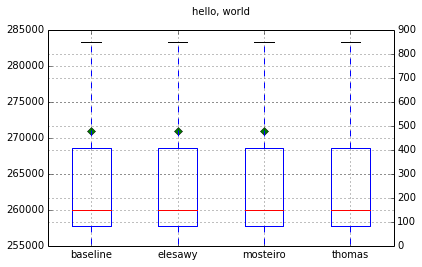

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
final_heating_demand.sum().plot(ax=ax1, style='Dg')
locs = ax1.get_xticks()

final_heating_demand.boxplot(ax=ax2, positions=[1, 2, 3, 4], sym='')
locs2 = ax2.get_xticks()
plt.suptitle('hello, world')
plt.show(fig)

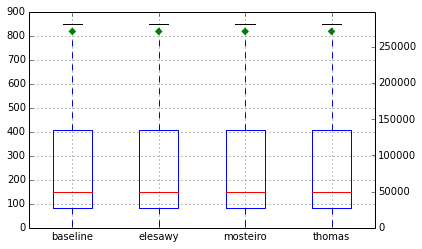

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
final_heating_demand.boxplot(ax=ax1, sym='')
y = final_heating_demand.sum().ravel()
ax2.set_ylim(bottom=0, top=max(y) * 1.1)
x = ax1.get_xticks()
plt.scatter(x, y, marker='D', color='g')
plt.show(fig)

In [13]:
plt.title?

In [9]:
ax2.get_xticklabels()

<a list of 4 Text xticklabel objects>

In [10]:
final_heating_demand.sum().ravel()

array([ 270995.64,  270995.64,  270995.64,  270995.64])

In [11]:
final_heating_demand.sum().shape[0]

4

In [12]:
df = pd.read_csv(locator1.get_total_demand()).set_index('Name')
list(df.columns)

NameError: name 'locator1' is not defined

In [ ]:
demand_plot_columns = ['Ef_MWhyr', 'QHf_MWhyr', 'QCf_MWhyr']
embodied_plot_columns = ['pen_MJm2', 'pen_GJ', 'ghg_kgm2', 'ghg_ton']
operation_plot_columns = ['pen_MJm2', 'pen_GJ', 'ghg_kgm2', 'ghg_ton']

In [ ]:
locator1.get_lca_embodied('pen_MJm2')

In [ ]:
list(pd.read_csv(locator1.get_lca_embodied()).set_index('Name').columns)

In [ ]:
list(pd.read_csv(locator1.get_lca_operation()).set_index('Name').columns)

In [ ]:
nrows = len(demand_plot_columns) + len(embodied_plot_columns) + len(operation_plot_columns)
fig, axes = plt.subplots(nrows=nrows)

In [ ]:
len(axes), nrows

In [ ]:
"""
This is a demo of creating a pdf file with several pages,
as well as adding metadata and annotations to pdf files.
"""

import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('multipage_pdf.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

    plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    x = np.arange(0, 5, 0.1)
    plt.plot(x, np.sin(x), 'b-')
    plt.title('Page Two')
    #pdf.attach_note("plot of sin(x)")  # you can add a pdf note to
                                       # attach metadata to a page
    pdf.savefig()
    plt.close()

    plt.rc('text', usetex=False)
    fig = plt.figure(figsize=(4, 5))
    plt.plot(x, x*x, 'ko')
    plt.title('Page Three')
    pdf.savefig(fig)  # or you can pass a Figure object to pdf.savefig
    plt.close()

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Multipage PDF Example'
    d['Author'] = u'Daren Thomas'
    d['Subject'] = 'How to create a multipage pdf file and set its metadata'
    d['Keywords'] = 'PdfPages multipage keywords author title subject'
    d['CreationDate'] = datetime.datetime(2009, 11, 13)
    d['ModDate'] = datetime.datetime.today()